In [32]:
import pandas as pd

In [33]:
import pandas as pd

# Load the Excel file
excel_file = "data2.xlsx"

# Read the desired sheet
df = pd.read_excel(excel_file, sheet_name="Sheet1")

# Save to CSV
df.to_csv("output.csv", index=False, encoding="utf-8")


In [34]:
df = pd.read_csv("output.csv")
df

,Interest in Simulation and Modelling,Performance in Simulation and Modelling,Interest in Probability and Statistics,Performance in Probability and Statistics,Interest in Data Analysis,Performance in Data Analysis,Interest in Statistical Computing,Performance in Statistical Computing
0,8.200000,88,8.400000,67,7.600000,80,8.400000,62
1,4.600000,88,4.200000,59,10.000000,90,4.600000,70
2,10.000000,78,10.000000,56,9.800000,84,10.000000,74
3,10.000000,78,10.000000,71,8.600000,65,7.400000,70
4,7.800000,82,6.800000,61,9.600000,33,9.400000,85
5,8.800000,77,7.200000,36,8.400000,77,7.200000,72
6,8.000000,94,8.200000,53,10.000000,76,8.400000,50
7,7.800000,90,8.200000,73,1.000000,66,1.000000,62
8,7.200000,91,6.400000,71,10.000000,75,10.000000,68
9,10.000000,92,10.000000,64,8.400000,75,8.000000,70


In [35]:
df.head

<bound method NDFrame.head of     Interest in Simulation and Modelling  \
0                               8.200000   
1                               4.600000   
2                              10.000000   
3                              10.000000   
4                               7.800000   
5                               8.800000   
6                               8.000000   
7                               7.800000   
8                               7.200000   
9                              10.000000   
10                              6.200000   
11                              4.800000   
12                              6.800000   
13                              7.000000   
14                              7.742857   
15                              7.085714   
16                              7.700000   
17                              7.228571   
18                              7.300000   
19                              6.857143   
20                              7.871429   
21

In [36]:
df.shape

(30, 8)

In [37]:
df.isnull().sum()

Interest in Simulation and Modelling         0
Performance in Simulation and Modelling      0
Interest in Probability and Statistics       0
Performance in Probability and Statistics    0
Interest in Data Analysis                    0
Performance in Data Analysis                 0
Interest in Statistical Computing            0
Performance in Statistical Computing         0
dtype: int64

In [38]:
df.dropna(how="any", inplace=True)
df.isnull().sum()

Interest in Simulation and Modelling         0
Performance in Simulation and Modelling      0
Interest in Probability and Statistics       0
Performance in Probability and Statistics    0
Interest in Data Analysis                    0
Performance in Data Analysis                 0
Interest in Statistical Computing            0
Performance in Statistical Computing         0
dtype: int64

In [39]:
for column in df:
    print(df[column].unique())

[ 8.2         4.6        10.          7.8         8.8         8.
  7.2         6.2         4.8         6.8         7.          7.74285714
  7.08571429  7.7         7.22857143  7.3         6.85714286  7.87142857
  7.34285714  7.4         8.17142857  6.9         7.48571429  7.95714286
  7.94285714  7.45714286  7.21428571]
[88 78 82 77 94 90 91 92 93 80 81 79 68 83 73 84 85 87]
[ 8.4         4.2        10.          6.8         7.2         8.2
  6.4         5.4         6.2         7.4         7.6         7.72857143
  7.38571429  7.91428571  7.52857143  7.75714286  7.14285714  7.47142857
  8.          7.74285714  7.11428571  7.27142857  7.9         7.87142857
  7.12857143]
[67 59 56 71 61 36 53 73 64 26 54 62 60 70 77 57 55 88 52 72 78 63 81 86
 91]
[ 7.6        10.          9.8         8.6         9.6         8.4
  1.          7.2         7.8         8.8         9.4         8.
  8.13333333  8.31428571  7.78095238  8.73333333  9.0952381   9.16190476
  8.87619048]
[80 90 84 65 33 77 76 66 75

In [40]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [41]:
scaler = StandardScaler()

In [42]:
df = pd.read_csv("output.csv", index_col="Performance in Statistical Computing")
df

,Interest in Simulation and Modelling,Performance in Simulation and Modelling,Interest in Probability and Statistics,Performance in Probability and Statistics,Interest in Data Analysis,Performance in Data Analysis,Interest in Statistical Computing
Performance in Statistical Computing,,,,,,,
62,8.200000,88,8.400000,67,7.600000,80,8.400000
70,4.600000,88,4.200000,59,10.000000,90,4.600000
74,10.000000,78,10.000000,56,9.800000,84,10.000000
70,10.000000,78,10.000000,71,8.600000,65,7.400000
85,7.800000,82,6.800000,61,9.600000,33,9.400000
72,8.800000,77,7.200000,36,8.400000,77,7.200000
50,8.000000,94,8.200000,53,10.000000,76,8.400000
62,7.800000,90,8.200000,73,1.000000,66,1.000000
68,7.200000,91,6.400000,71,10.000000,75,10.000000


In [43]:
df.shape

(30, 7)

In [44]:
df.describe

<bound method NDFrame.describe of                                       Interest in Simulation and Modelling  \
Performance in Statistical Computing                                         
62                                                                8.200000   
70                                                                4.600000   
74                                                               10.000000   
70                                                               10.000000   
85                                                                7.800000   
72                                                                8.800000   
50                                                                8.000000   
62                                                                7.800000   
68                                                                7.200000   
70                                                               10.000000   
68                            

In [45]:
df[['Interest_SM', 'Perf_SM', 'Interest_PS', 'Perf_PS', 'Interest_DA', 'Perf_DA']] = scaler.fit_transform(df[['Interest in Simulation and Modelling', 'Performance in Simulation and Modelling', 'Interest in Probability and Statistics', 'Performance in Probability and Statistics', 'Interest in Data Analysis', 'Performance in Data Analysis']])

In [46]:
df

,Interest in Simulation and Modelling,Performance in Simulation and Modelling,Interest in Probability and Statistics,Performance in Probability and Statistics,Interest in Data Analysis,Performance in Data Analysis,Interest in Statistical Computing,Interest_SM,Perf_SM,Interest_PS,Perf_PS,Interest_DA,Perf_DA
Performance in Statistical Computing,,,,,,,,,,,,,
62,8.200000,88,8.400000,67,7.600000,80,8.400000,0.540999,0.806811,0.744874,0.155901,-0.576945,0.577133
70,4.600000,88,4.200000,59,10.000000,90,4.600000,-2.511206,0.806811,-2.804444,-0.428728,0.920378,1.589648
74,10.000000,78,10.000000,56,9.800000,84,10.000000,2.067102,-0.947126,2.096995,-0.647964,0.795601,0.982139
70,10.000000,78,10.000000,71,8.600000,65,7.400000,2.067102,-0.947126,2.096995,0.448216,0.046940,-0.941638
85,7.800000,82,6.800000,61,9.600000,33,9.400000,0.201865,-0.245551,-0.607247,-0.282571,0.670824,-4.181684
72,8.800000,77,7.200000,36,8.400000,77,7.200000,1.049700,-1.122519,-0.269217,-2.109536,-0.077837,0.273379
50,8.000000,94,8.200000,53,10.000000,76,8.400000,0.371432,1.859172,0.575859,-0.867200,0.920378,0.172127
62,7.800000,90,8.200000,73,1.000000,66,1.000000,0.201865,1.157598,0.575859,0.594373,-4.694582,-0.840387
68,7.200000,91,6.400000,71,10.000000,75,10.000000,-0.306835,1.332991,-0.945277,0.448216,0.920378,0.070876


In [47]:
def optimize_kmeans(data, max_k):
    means=[]
    inertias=[]
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)

    #Generating elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Num of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

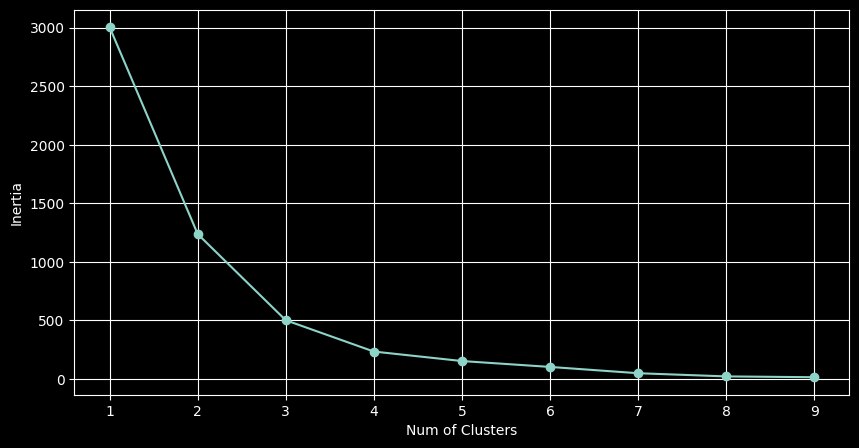

In [48]:
optimize_kmeans(df[['Performance in Data Analysis', 'Interest in Data Analysis']], 10)

In [49]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df[['Interest in Data Analysis', 'Performance in Data Analysis']])

KMeans(n_clusters=4)

In [50]:
df['kmeans_3'] = kmeans.labels_
df

,Interest in Simulation and Modelling,Performance in Simulation and Modelling,Interest in Probability and Statistics,Performance in Probability and Statistics,Interest in Data Analysis,Performance in Data Analysis,Interest in Statistical Computing,Interest_SM,Perf_SM,Interest_PS,Perf_PS,Interest_DA,Perf_DA,kmeans_3
Performance in Statistical Computing,,,,,,,,,,,,,,
62,8.200000,88,8.400000,67,7.600000,80,8.400000,0.540999,0.806811,0.744874,0.155901,-0.576945,0.577133,3
70,4.600000,88,4.200000,59,10.000000,90,4.600000,-2.511206,0.806811,-2.804444,-0.428728,0.920378,1.589648,0
74,10.000000,78,10.000000,56,9.800000,84,10.000000,2.067102,-0.947126,2.096995,-0.647964,0.795601,0.982139,0
70,10.000000,78,10.000000,71,8.600000,65,7.400000,2.067102,-0.947126,2.096995,0.448216,0.046940,-0.941638,1
85,7.800000,82,6.800000,61,9.600000,33,9.400000,0.201865,-0.245551,-0.607247,-0.282571,0.670824,-4.181684,2
72,8.800000,77,7.200000,36,8.400000,77,7.200000,1.049700,-1.122519,-0.269217,-2.109536,-0.077837,0.273379,3
50,8.000000,94,8.200000,53,10.000000,76,8.400000,0.371432,1.859172,0.575859,-0.867200,0.920378,0.172127,3
62,7.800000,90,8.200000,73,1.000000,66,1.000000,0.201865,1.157598,0.575859,0.594373,-4.694582,-0.840387,1
68,7.200000,91,6.400000,71,10.000000,75,10.000000,-0.306835,1.332991,-0.945277,0.448216,0.920378,0.070876,3


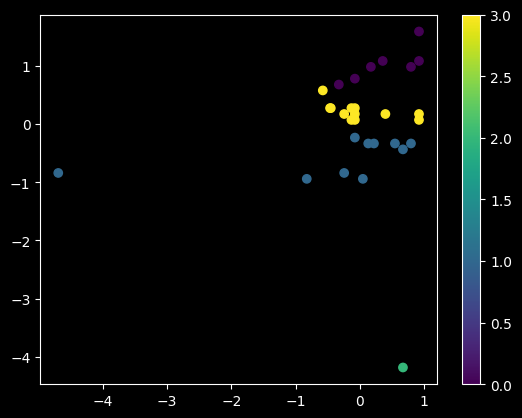

In [51]:
scatter = plt.scatter(x=df['Interest_DA'], y=df['Perf_DA'], c=df['kmeans_3'], cmap='viridis')
plt.colorbar(scatter)

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [53]:
df.reset_index(inplace=True)

In [54]:
features = ["Interest in Simulation and Modelling", 
            "Interest in Probability and Statistics", 
            "Interest in Data Analysis", 
            "Interest in Statistical Computing"]
labels = ["Performance in Simulation and Modelling", 
           "Performance in Probability and Statistics", 
           "Performance in Data Analysis", 
           "Performance in Statistical Computing"]

In [55]:
x = df[features]
y = df[labels]

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
model = RandomForestRegressor()

In [58]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [59]:
y_pred = model.predict(x_test)

In [60]:
# evaluate model
from sklearn.metrics import mean_squared_error, r2_score
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Mean Squared Error: 59.13236666666667
R2 Score: -0.8214650121663205


In [61]:
df["Predicted Overall Performance"] = model.predict(x).mean(axis=1)

In [62]:
column_order = [
    "Interest in Simulation and Modelling",
    "Performance in Simulation and Modelling",
    "Interest in Probability and Statistics",
    "Performance in Probability and Statistics",
    "Interest in Data Analysis",
    "Performance in Data Analysis",
    "Interest in Statistical Computing",
    "Performance in Statistical Computing",
    "Predicted Overall Performance",
    "Interest_SM",
    "Perf_SM",
    "Interest_PS",
    "Perf_PS",
    "Interest_DA",
    "Perf_DA",
    "kmeans_3"
]
df = df[column_order]
df.head()

,Interest in Simulation and Modelling,Performance in Simulation and Modelling,Interest in Probability and Statistics,Performance in Probability and Statistics,Interest in Data Analysis,Performance in Data Analysis,Interest in Statistical Computing,Performance in Statistical Computing,Predicted Overall Performance,Interest_SM,Perf_SM,Interest_PS,Perf_PS,Interest_DA,Perf_DA,kmeans_3
0,8.2,88,8.4,67,7.6,80,8.4,62,73.255,0.540999,0.806811,0.744874,0.155901,-0.576945,0.577133,3
1,4.6,88,4.2,59,10.0,90,4.6,70,72.970,-2.511206,0.806811,-2.804444,-0.428728,0.920378,1.589648,0
2,10.0,78,10.0,56,9.8,84,10.0,74,71.965,2.067102,-0.947126,2.096995,-0.647964,0.795601,0.982139,0
3,10.0,78,10.0,71,8.6,65,7.4,70,70.890,2.067102,-0.947126,2.096995,0.448216,0.046940,-0.941638,1
4,7.8,82,6.8,61,9.6,33,9.4,85,68.235,0.201865,-0.245551,-0.607247,-0.282571,0.670824,-4.181684,2
